In [25]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl


In [54]:
Center_Pin_Width = 75e-3 #mm
Spacing = 4e-3 #Only needed for Ls and Cs calc
Length = 1000 #mm, change me
#We get Ls and Cs from, https://wcalc.sourceforge.net/cgi-bin/coplanar.cgi
Ls = 219.587 #pH/mm
Cs = 0.324684 #pF/mm
L_kin = 55 #pH/square
Num_Of_Squares = Length/Center_Pin_Width
Z = np.sqrt((Ls*Length+L_kin*Num_Of_Squares)/(Cs*Length))
print('Impedance is ',Z)
print('Number of square is ',Num_Of_Squares)

Impedance is  54.17486691913189
Number of square is  13333.333333333334


In [59]:
Center_Pin_Width = 85e-3 #mm
Spacing = 2e-3 #Only needed for Ls and Cs calc
Length = 1000 #mm, change me
#We get Ls and Cs from, https://wcalc.sourceforge.net/cgi-bin/coplanar.cgi
Ls = 191.081 #pH/mm
Cs = 0.373044 #pF/mm
L_kin = 80 #pH/square
Num_Of_Squares = Length/Center_Pin_Width
Z = np.sqrt((Ls*Length+L_kin*Num_Of_Squares)/(Cs*Length))
print('Impedance is ',Z)
print('Number of square is ',Num_Of_Squares)

Impedance is  55.092511094591615
Number of square is  11764.70588235294


In [60]:
Center_Pin_Width = 95e-3 #mm
Spacing = 16e-3 #Only needed for Ls and Cs calc
Length = 1000 #mm, change me
#We get Ls and Cs from, https://wcalc.sourceforge.net/cgi-bin/coplanar.cgi
Ls = 296.564 #pH/mm
Cs = 0.240723 #pF/mm
L_kin = 80 #pH/square
Num_Of_Squares = Length/Center_Pin_Width
Z = np.sqrt((Ls*Length+L_kin*Num_Of_Squares)/(Cs*Length))
print('Impedance is ',Z)
print('Number of square is ',Num_Of_Squares)

Impedance is  68.7764895806104
Number of square is  10526.315789473683


In [39]:
def FeedlineResonator(ResonatorLength = None,
                      ResonatorWidth = None,
                      FeedLineWidth = None,
                      FeedLineLength = None,
                      FeedLineSpacing = None,
                      ChipHeight = None):
    
    if ResonatorLength == None:
        ResonatorLength = 1500
    if ResonatorWidth == None:
        ResonatorWidth  = 2
    if FeedLineWidth == None:
        FeedLineWidth   = 85
    if FeedLineLength == None:
        FeedLineLength  = 2000
    if FeedLineSpacing == None:
        FeedLineSpacing = 2
    if ChipHeight == None:
        ChipHeight      = 2000

    FeedLineResonatorInnerPin_device = Device()
    FeedLine_rect = pg.taper(length = FeedLineLength, width1 = FeedLineWidth, width2 = FeedLineWidth, port = None, layer = 0)
    Resonator_rect = pg.taper(length = ResonatorLength, width1 = ResonatorWidth, width2 = ResonatorWidth, port = None, layer = 0)

    FeedLineRight_ref = FeedLineResonatorInnerPin_device << FeedLine_rect
    FeedLineLeft_ref = FeedLineResonatorInnerPin_device << FeedLine_rect
    Resonator_ref = FeedLineResonatorInnerPin_device << Resonator_rect

    Resonator_ref.connect(2,FeedLineLeft_ref.ports[1])
    FeedLineRight_ref.connect(2,Resonator_ref.ports[1])

    FeedLineResonator_Device = Device()

    Spacing_rect = pg.taper(length = 2*FeedLineLength+ResonatorLength+2*FeedLineSpacing, width1 = FeedLineWidth+2*FeedLineSpacing, width2 = FeedLineWidth+2*FeedLineSpacing, port = None, layer = 0)

    Chip_rect = pg.rectangle(size=(2*FeedLineLength+ResonatorLength+2*FeedLineSpacing, ChipHeight))


    FeedLineResonatorInnerPin_ref = FeedLineResonator_Device << FeedLineResonatorInnerPin_device
    Spacing_ref = FeedLineResonator_Device << Spacing_rect
    Chip_ref = FeedLineResonator_Device << Chip_rect

    FeedLineResonatorInnerPin_ref.move(Chip_ref.center - FeedLineResonatorInnerPin_ref.center)
    Spacing_ref.move(Chip_ref.center - Spacing_ref.center)


    EtchedArea = pg.xor_diff(A = Spacing_ref,B = Chip_ref, precision=1e-6)

    FinalDevice = Device()
    EtchedArea = FinalDevice << EtchedArea
    FeedLineResonatorInnerPin_ref = FinalDevice << FeedLineResonatorInnerPin_device
    FeedLineResonatorInnerPin_ref.move(EtchedArea.center-FeedLineResonatorInnerPin_ref.center)

    return FinalDevice

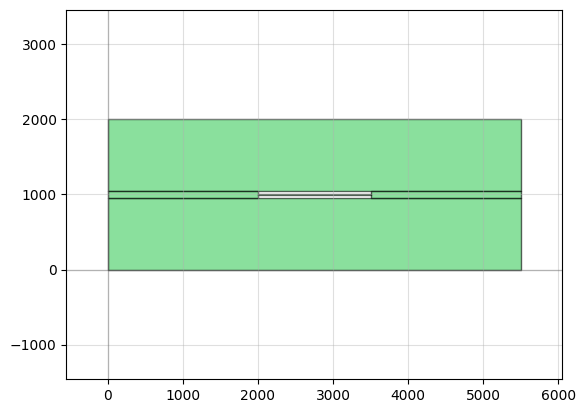

In [42]:
FLR_Device = FeedlineResonator(ResonatorLength = None,ResonatorWidth = None,FeedLineWidth = None,FeedLineLength = None,FeedLineSpacing = None,ChipHeight = None)

FLR_Device.write_gds('ResToRas01')

qp(FLR_Device)